<a href="https://colab.research.google.com/github/cinalimaster/ariftanis/blob/main/FuzzyLogic_Tip_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fuzzy Logic with Python

In [1]:
# pip install scikit-fuzzy
!pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 9.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=69fb18a553eb65344480a92795c6e1239764658eca0d66b64ba9c1ce1ec59b05
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
# import required libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [8]:
# define input and output variables
# quality and service "Antedecent" öncül "Consequent" netice
"""we define variable parameters 1,2,3..10 and variable names here below"""
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

In [9]:
# we set parameters for membership functions
quality.automf(3) 
service.automf(3)

In [10]:
# we set parameters limits for triangle membership functions
tip['low'] = fuzz.trimf(tip.universe, [0,0,13])
tip['medium'] = fuzz.trimf(tip.universe, [0,13,25])
tip['high'] = fuzz.trimf(tip.universe, [13,25,25])

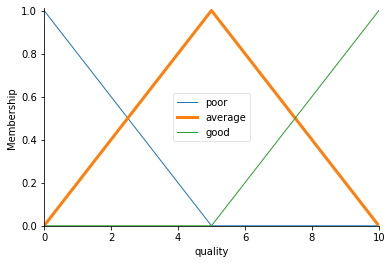

In [11]:
# we check quality membership function plot shape
quality['average'].view()

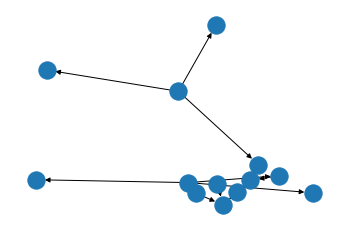

In [13]:
# we define rules with ctrl function
# rule1 if quality and service both poor tip should be low
rule1 = ctrl.Rule(quality['poor'] & service ['poor'], tip['low'])
rule1.view()
# we repeat similar approach for rule 2 and rule 3
rule2 = ctrl.Rule(quality['average'] & service ['average'], tip['medium'])
rule3 = ctrl.Rule(quality['good'] & service ['good'], tip['high'])

In [16]:
# tipping_ctrl variable depends of ctrl.ControlSystems function and 3 rule paramaters
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
# we can simulate tipping with ControlSystemsSimulation function and tipping_ctrl parameter 
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [23]:
# we provide input variables for start simulation...
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.0
# we calculate tipping result value
tipping.compute()

In [24]:
# we ask to print tipping result
print(tipping.output['tip'])

14.313864306784662


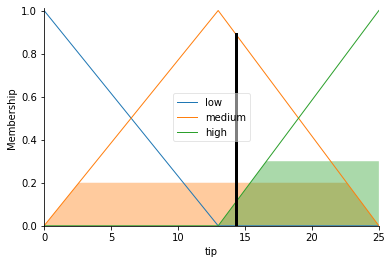

In [25]:
# we plot result chart
tip.view(sim=tipping)